In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('feature_Selection.csv')
df.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income,Approved
0,1,1.25,1,321.692754,1
1,1,3.04,6,560.000000,1
2,1,1.50,0,824.000000,1
3,1,3.75,5,3.000000,1
4,1,1.71,0,321.692754,1


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Approved',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income
0,0.95465,-0.300502,-0.324711,-0.288910
1,0.95465,0.379591,1.079116,0.211684
2,0.95465,-0.205517,-0.605477,0.766248
3,0.95465,0.649348,0.798351,-0.958363
4,0.95465,-0.125730,-0.605477,-0.288910


In [6]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['Approved'],test_size=0.20,random_state=10)

In [7]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB().fit(X_train,y_train)
prediction=NB.predict(X_test)

In [12]:
type(prediction)

numpy.ndarray

In [11]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score
print(f'confusion matrix : {confusion_matrix(y_test,prediction)}')
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')
print(classification_report(y_test,prediction))

confusion matrix : [[66  4]
 [20 48]]
Accuracy Score : 0.8260869565217391
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        70
           1       0.92      0.71      0.80        68

    accuracy                           0.83       138
   macro avg       0.85      0.82      0.82       138
weighted avg       0.84      0.83      0.82       138



In [ ]:
confusion_matrix(y_test,prediction)

In [9]:
# Area Under Curve
auc = roc_auc_score(y_test, prediction)
auc

0.8243697478991597

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)

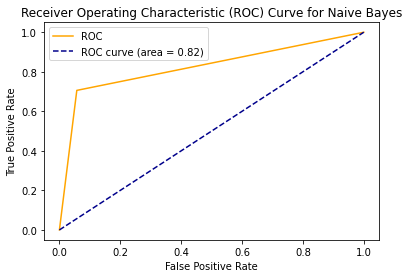

In [11]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [12]:
import pickle
# save the model to disk
filename = 'finalized_model_nb.sav'
pickle.dump(NB, open(filename, 'wb'))